<a href="https://colab.research.google.com/github/NRmethun/ML-DL-Notebook/blob/main/inception_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (350, 350, 3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2021-04-12 20:26:29--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 172.217.2.112, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   229MB/s    in 0.4s    

2021-04-12 20:26:29 (229 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 20, 20, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (6, activation='softmax')(x)

model = Model( pre_trained_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
train_dir = '/content/drive/My Drive/Carrot_6/Train'
validation_dir  ='/content/drive/My Drive/Carrot_6/Test'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,

                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )


In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical',
                                                    target_size = (350, 350))


# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical',
                                                          target_size = (350, 350)
)

Found 480 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = len(train_generator),
            epochs = 20,
            validation_steps =validation_generator.n // BS,,
            verbose = 2)

Epoch 1/20
24/24 - 15s - loss: 4.3182 - accuracy: 0.3021 - val_loss: 1.0757 - val_accuracy: 0.5917
Epoch 2/20
24/24 - 15s - loss: 1.3771 - accuracy: 0.5229 - val_loss: 1.3903 - val_accuracy: 0.5333
Epoch 3/20
24/24 - 15s - loss: 0.9946 - accuracy: 0.6583 - val_loss: 1.1231 - val_accuracy: 0.5417
Epoch 4/20
24/24 - 15s - loss: 0.8865 - accuracy: 0.7021 - val_loss: 0.5962 - val_accuracy: 0.8000
Epoch 5/20
24/24 - 15s - loss: 0.7016 - accuracy: 0.7396 - val_loss: 0.7511 - val_accuracy: 0.7417
Epoch 6/20
24/24 - 15s - loss: 0.8906 - accuracy: 0.7104 - val_loss: 0.6130 - val_accuracy: 0.7833
Epoch 7/20
24/24 - 15s - loss: 0.5992 - accuracy: 0.7917 - val_loss: 0.8926 - val_accuracy: 0.7333
Epoch 8/20
24/24 - 15s - loss: 0.5866 - accuracy: 0.7854 - val_loss: 1.1961 - val_accuracy: 0.6833
Epoch 9/20
24/24 - 15s - loss: 0.6258 - accuracy: 0.8042 - val_loss: 0.5677 - val_accuracy: 0.8667
Epoch 10/20
24/24 - 15s - loss: 0.4840 - accuracy: 0.8333 - val_loss: 0.6788 - val_accuracy: 0.8083
Epoch 11/

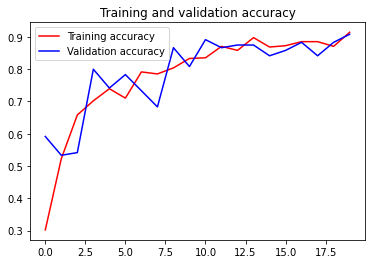

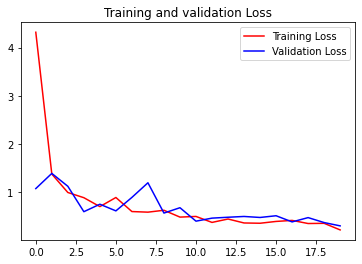

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()



In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(350, 350))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 15.jpg to 15.jpg
15.jpg
[[0. 1. 0. 0. 0. 0.]]
